### Imports

In [1]:
from SPDC_Simulation import SPDC_Simulation
from Crystal import Crystal
from Laser import Laser

import warnings
warnings.filterwarnings("ignore")

### Run the simulation

In [2]:
# Initialize crystal parameters
Lc = 46.175e-6                # Coherence length (in meters)
Lo = 30e-3                    # Crystal length (in meters)
T = 28.35              # Temperature (in degrees Celsius)
w = 18e-6                     # Domain width parameter (in meters)
mstart = 2                    # Starting index for the algorithm
crystal = Crystal(Lc, Lo, T, w, mstart)

# Initialize laser parameters
lambda_2w = 775e-9            # Central wavelength of the pump (in meters)
pulse_duration = 1.7e-12      # Pulse duration (in seconds)
laser = Laser(lambda_2w, pulse_duration)

# Generate the poling pattern in the crystal
crystal.generate_poling(laser=laser, mode='custom', resolution=5)

# Create and run the simulation
simulation = SPDC_Simulation(crystal, laser)

simulation.run_simulation(steps=100, dev=5)

### Accessing simulated results

In [3]:
print(f'The simulated purity is P={simulation.Purity}')
print(f'The simulated Schmidt number K={simulation.K}')

The simulated purity is P=0.9943463023173122
The simulated Schmidt number K=1.0056858437241754


### Plot the results

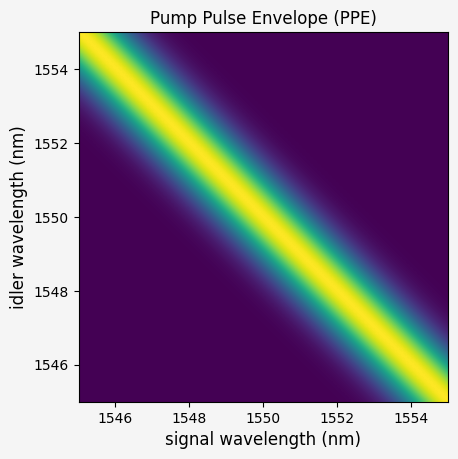

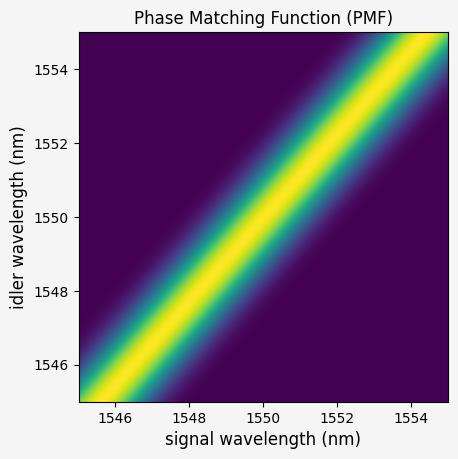

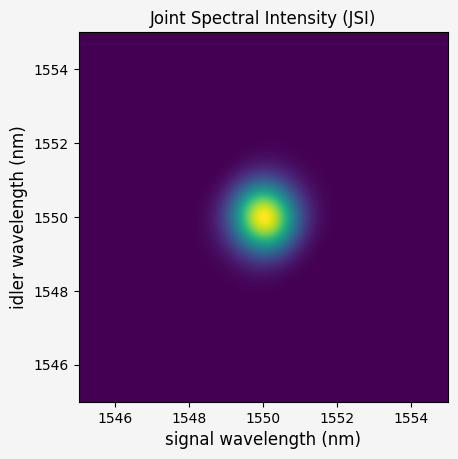

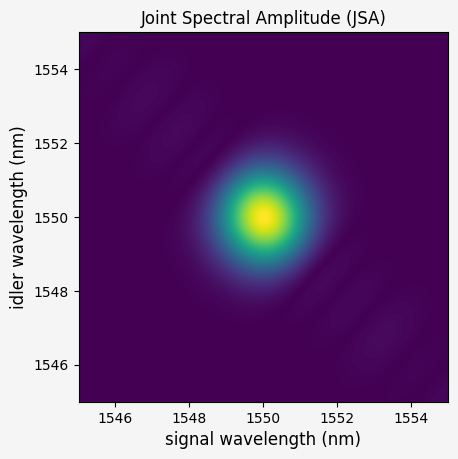

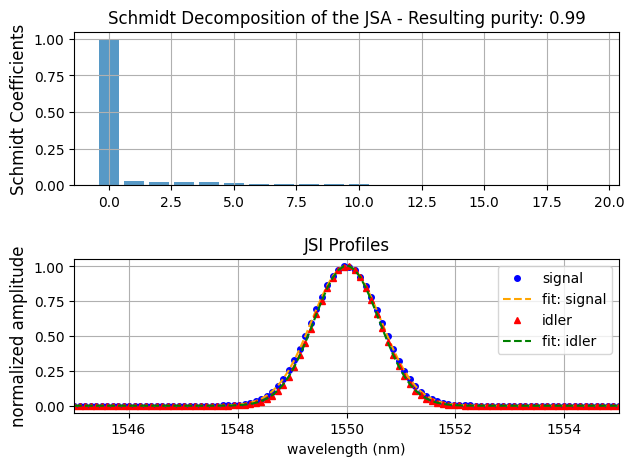

In [4]:
simulation.plot_results()

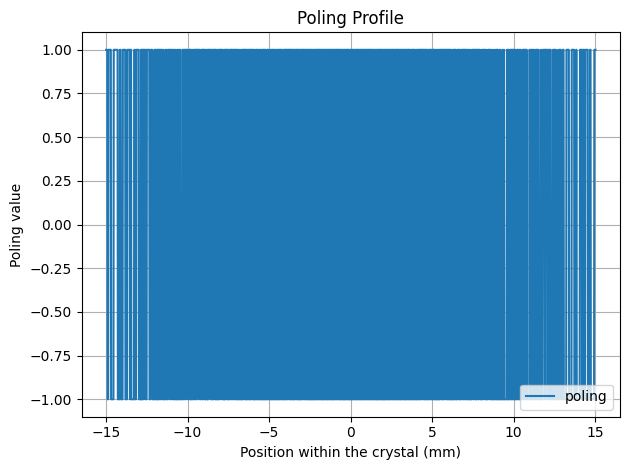

In [5]:
simulation.plot_poling()

### Benchmarking of some functions

In [6]:
import timeit
import numpy as np
# Benchmark original Atarget
def original_Atarget():
    z = np.linspace(0, 1000 * 1e-6, num=1000)
    g = np.exp(-((z - 1e-3 / 2) ** 2) / (1e-3 ** 2 / 8))
    cos_term = np.cos(np.pi / (1e-6 / 2) * z)
    exp_term = np.exp(1j * 0.1 * z)
    y = g * cos_term * exp_term
    return -1j * np.trapz(y, z)

# Benchmark optimized Atarget
def optimized_Atarget():
    z = np.linspace(0, 1000 * 1e-6, num=1000)
    g = np.exp(-((z - 1e-3 / 2) ** 2) / (1e-3 ** 2 / 8))
    cos_term = np.cos(np.pi / (1e-6 / 2) * z)
    exp_term = np.exp(1j * 0.1 * z)
    y = g * cos_term * exp_term
    return -1j * np.trapz(y, z)

# Measure execution time
original_time = timeit.timeit(original_Atarget, number=1000)
optimized_time = timeit.timeit(optimized_Atarget, number=1000)

print(f"Original Atarget time: {original_time:.6f} seconds")
print(f"Optimized Atarget time: {optimized_time:.6f} seconds")
print(f"Speedup: {original_time / optimized_time:.2f}x")

Original Atarget time: 0.030545 seconds
Optimized Atarget time: 0.029379 seconds
Speedup: 1.04x


In [7]:
import timeit

# Benchmark original run_simulation
def original_simulation():
    sim = SPDC_Simulation(crystal, laser)
    sim.run_simulation(steps=100, dev=5)

# Benchmark optimized run_simulation
def optimized_simulation():
    sim = SPDC_Simulation(crystal, laser)
    sim.run_simulation_optimized(steps=100, dev=5)

original_time = timeit.timeit(original_simulation, number=10)
optimized_time = timeit.timeit(optimized_simulation, number=10)

print(f"Original runtime: {original_time:.6f} seconds")
print(f"Optimized runtime: {optimized_time:.6f} seconds")
print(f"Speedup: {original_time / optimized_time:.2f}x")

Original runtime: 3.465672 seconds
Optimized runtime: 3.373095 seconds
Speedup: 1.03x
